# Introducción a Aprendizaje Reforzado

## Los paradigmas de aprendizaje de máquinas


:::{admonition} **Aprendizaje Supervisado**

Tenemos un dataset de **ejemplos etiquetados** $(x, y)$ y buscamos una relación $f: x \to y$, es decir predecir $y$ dado $x$. 

:::

<img src="images/intro-ml1.png" width="600">

Los modelos de regresión y clasificación son ejemplos de este paradigma. En regresión la etiqueta es una variable ordinal mientras que en clasificación la etiqueta es una variable categórica. 

Si el modelo es paramétrico lo ajustamos (aprendemos sus parámetros) minimizando una función de costo. Por ejemplo, el modelo de regresión logística

$$
f_\theta = \theta_0 + \sum_{j=1}^D \theta_j x_j
$$ 

se ajusta minimizando la entropía cruzada

$$
\min_{\theta} \sum_{i=1}^N y_i \log \left (f_\theta (x_i) \right)
$$



:::{admonition} **Aprendizaje No Supervisado**

Tenemos un dataset de **ejemplos sin etiqueta** $(x)$ y buscamos una representación de los datos con ciertas características.

:::

<img src="images/intro-ml2.png" width="400">

Los métodos de reducción de dimensionalidad y agrupamiento (clustering) son ejemplos de este paradigma. Por ejemplo, el método de K-Means busca un conjunto de $K$ representantes (centroides) $\mu_j$ que resumen el dataset completo en base a la relación de similitud entre los datos:

$$
\min  \sum_{i=1}^N \sum_{k=1}^K w_{ik} \|x_i - \mu_k\|^2 \quad w_{ik} = \begin{cases} 1 & k = \text{arg}\min_j \| x_i - \mu_j\|^2 \\ 0 & \sim \end{cases} 
$$ 




:::{admonition} **Aprendizaje por Refuerzo**

Se busca **aprender** un sistema que toma las mejores **decisiones** para interactuar con un **ambiente** cambiante.

:::

<img src="images/intro-ml3.png" width="400">


¿Quién toma las decisiones?

> El sistema que toma las decisiones e interactua con el ambiente se llama **agente**

¿Cómo se cual es la mejor decisión?

> La mejor decisión es aquella que obtiene mayor **recompensa**


Esto supone diferencias importantes con los paradigmas anteriores. A continuación se definen los componentes de RL resaltando estas diferencias.



## Componentes de Aprendizaje Reforzado

El siguiente diagrama (Sutton & Barto, Fig 3.1) muestra como interactuan los componentes principales de RL:

<img src="images/intro-rl1.png" width="600">

Ambiente (Environment) y Estado (State)
: En RL, en lugar de ejemplos existe un **ambiente** el cual podemos observar. La percepción del ambiente no siempre es completa. El ambiente se representa por un vector denominado **estado**. 

Acciones (Actions)
: El agente no retorna predicciones sino que toma **decisiones**. En cada instante el agente escoge y realiza una **acción**. Las acciones realizadas pueden modificar el ambiente, es decir que tienen consecuencias.

Recompensa (Reward)
: La retroalimentación del agente no proviene de etiquetas sino de una señal numérica escalar llamada **recompensa**. Típicamente, la recompensa está asociada a llegar a uno o más estados. 


**Características de RL**

- Supervisión: Al agente no se le dice que acción es buena, sino que estados son buenos.
- Prueba y error: El agente debe descubrir que acción le entrega la mayor recompensa probándolas una a una.
- Temporalidad: El entrenamiento y la ejecución son secuenciales, no se puede asumir independiencia.
- Retraso en la retroalimentación: Las recompensas pueden demorar en llegar, las acciones pueden no traer recompensa inmediata pero si en el futuro.



**Objetivo del agente**

El agente busca seleccionar acciones para maximizar la **recompensa acumulada futura**. 

:::{note}

En ciertos casos podría ser mejor abandonar una recompensa intermedia en pos de obtener una mayor recompensa final

:::

**Hipótesis de recompensa**

Todo objetivo puede ser representado mediante la maximización de la recompensa acumulada esperada.



**Ciclo de vida de un agente**

En general se asume que el tiempo es discreto. La vida del agente se resume en el diagrama anterior, es decir que, en cada tiempo instante $t$ el agente:

1. **recibe recompensa del ambiente:** $R_t$
1. **observa el ambiente:** $S_t$
1. **realiza una acción:** $A_t$

o en pseudo-código

    for t in 1, 2, 3, ...
        get Rt
        get St
        do At
        
Luego la **historia** de un agente se puede definir como la siguiente trayectoria:

$$
H_t = ((S_0, A_0), (R_1, S_1, A_1), \ldots, (R_{t-1}, S_{t-1}, A_{t-1}), (R_t, S_t, A_t))
$$


## Discusiones

¿Puedes reconocer los agentes, las acciones, el ambiente, la recompensa y demás elementos de RL en los siguientes ejemplos?

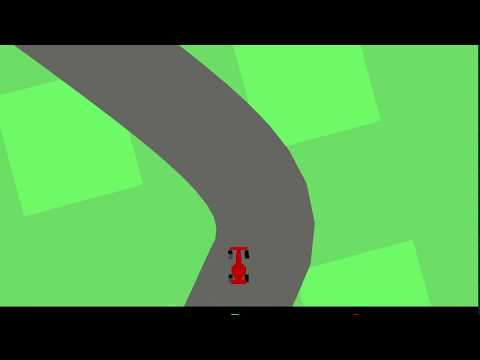

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("Ev0wpVB7OEs", width=800, height=400)

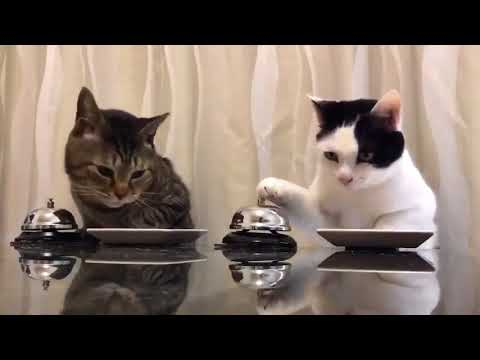

In [3]:
YouTubeVideo("lpi19vExbzc", width=800, height=400)

Reflexione ¿Cuáles son las complejidades de RL en el mundo real?

> Phil prepara su desayuno. Si se examina de cerca, incluso esta aparentemente mundana actividad revela una compleja red de comportamiento condicional y relaciones interconectadas de metas y submetas: caminar hacia el armario, abrirlo, seleccionar una caja de cereal y luego alcanzar, agarrar y recuperar la caja. Otros complejos y ajustados secuencias interactivas de comportamiento son necesarias para obtener un tazón, una cuchara y un cartón de leche. Cada paso implica una serie de movimientos oculares para obtener información y guiar el alcance y la locomoción. Se realizan juicios rápidos continuamente sobre cómo llevar los objetos o si es mejor transportar algunos de ellos a la mesa antes de obtener otros. Cada paso está guiado por metas, como agarrar una cuchara o llegar al refrigerador, y está al servicio de otras metas, como tener la cuchara para comer una vez que se haya preparado el cereal y, en última instancia, obtener alimentación. Ya sea consciente o no, Phil está accediendo a información sobre el estado de su cuerpo que determina sus necesidades nutricionales, nivel de hambre y preferencias alimenticias.
>
> Traducción. Original en la Sección 1.2 de Sutton & Barto

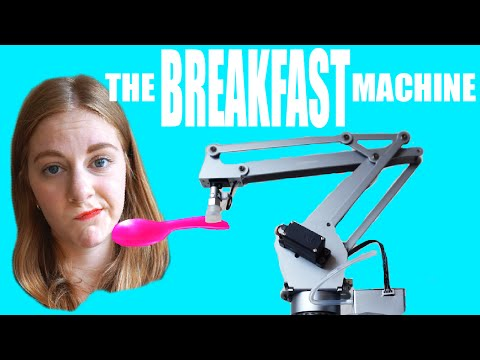

In [5]:
YouTubeVideo("E2evC2xTNWg", width=800, height=400)

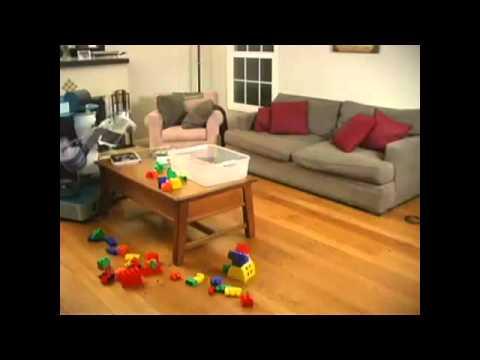

In [4]:
YouTubeVideo("qBZPSTR96N4", width=800, height=400)

En el video anterior se muestra el [robot PR1](https://ieeexplore.ieee.org/document/4543527) haciendo todo tipo de tareas domésticas. Sin embargo el video es un montaje, ya que PR1 está siendo operado remotamente por un humano.

> La habilidad motriz ya es suficiente, el desafio pendiente está en los algoritmos.
